# Import thư viện xử lí NLP

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import re
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
import warnings
warnings.filterwarnings("ignore")

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Import NLP dataset

In [4]:
# Reads in the data
train_data = pd.read_csv(r"C:\PYTHON LEARNING\DATA\etf keyword.csv",encoding= 'unicode_escape')
# Drops all columns text and target
#cols_to_drop = ['id', 'keyword', 'location']
#train_data = train_data.drop(cols_to_drop, axis=1)

In [5]:
train_data

text  \
0  What Is an ETF?\nAn exchange-traded fund (ETF) is a type of security that involves a collection of securitiessuch as stocksthat often tracks an underlying index, although they can invest in any number of industry sectors or use various strategies. ETFs are in many ways similar to mutual funds; however, they are listed on exchanges and ETF shares trade throughout the day just like ordinary stock.\n\n\nSome well-known example is the SPDR S&P 500 ETF (SPY), which tracks the S&P 500 Index. ETFs can contain many types of investments, including stocks, commodities, bonds, or a mixture of investment types. An exchange-traded fund is a marketable security, meaning it has an associated price that allows it to be easily bought and sold.\n\n\nKEY TAKEAWAYS\nAn exchange-traded fund (ETF) is a basket of securities that trade on an exchange, just like a stock.\nETF share prices fluctuate all day as the ETF is bought and sold; this is different from mutual funds that only trade once a day after the market closes.\nETFs can contain all types of investments including stocks, commodities, or bonds; some offer U.S. only holdings, while others are international.\nETFs offer low expense ratios and fewer broker commissions than buying the stocks individually.\nAn ETF is called an exchange-traded fund since it's traded on an exchange just like stocks. The price of an ETFs shares will change throughout the trading day as the shares are bought and sold on the market. This is unlike mutual funds, which are not traded on an exchange, and trade only once per day after the markets close.\n\n\n\nAn ETF is a type of fund that holds multiple underlying assets, rather than only one like a stock. Because there are multiple assets within an ETF, they can be a popular choice for diversification.\n\n\nAn ETF can own hundreds or thousands of stocks across various industries, or it could be isolated to one particular industry or sector. Some funds focus on only U.S. offerings, while others have a global outlook. For example, banking-focused ETFs would contain stocks of various banks across the industry.\n\n\nTypes of ETFs\nThere are various types of ETFs available to investors that can be used for income generation, speculation, price increases, and to hedge or partly offset risk in an investor's portfolio. Below are several examples of the types of ETFs.\n\nBond ETFs might include government bonds, corporate bonds, and state and local bondscalled municipal bonds.\nIndustry ETFs track a particular industry such as technology, banking, or the oil and gas sector.\nCommodity ETFs invest in commodities including crude oil or gold.\nCurrency ETFs invest in foreign currencies such as the Euro or Canadian dollar.\nInverse ETFs attempt to earn gains from stock declines by shorting stocks. Shorting is selling a stock, expecting a decline in value, and repurchasing it at a lower price.\nInvestors should be aware that many inverse ETFs are Exchange Traded Notes (ETNs) and not true ETFs. An ETN is a bond but trades like a stock and is backed by an issuer like a bank. Be sure to check with your broker to determine if an ETN is a right fit for your portfolio.\n\nIn the U.S., most ETFs are set up as open-ended funds and are subject to the Investment Company Act of 1940 except where subsequent rules have modified their regulatory requirements. Open-end funds do not limit the number of investors involved in the product.\n\nHow to Buy and Sell ETFs\nETFs trade through online brokers and traditional broker-dealers. You can view some of the top brokers in the industry for ETFs with Investopedia's list of the best brokers for ETFs. An alternative to standard brokers are robo-advisors like Betterment and Wealthfront who make use of ETFs in their investment products.\n\n\nReal World Examples of ETFs\nBelow are examples of popular ETFs on the market today. Some ETFs track an index of stocks creating a broad portfolio while others target specific industries.\n\nSPDR S&P 500 

# Giai đoạn xử lí NLP

### Xử lí kí tự thừa (@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?

In [6]:
# Removes punctuation and special characters
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))   
    return df
data_clean = clean_text(train_data, 'text', 'text')
# Removes stop words 
data_clean['text'] = data_clean['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

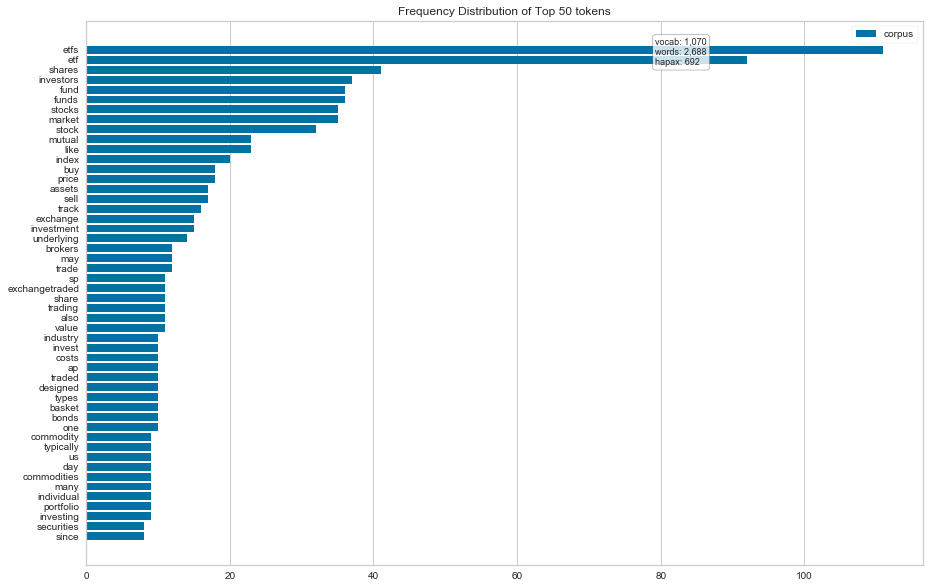

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(data_clean['text'])
features   = vectorizer.get_feature_names()
plt.figure(figsize=(15,10))
visualizer = FreqDistVisualizer(features=features, orient='h')
visualizer.fit(docs)
visualizer.show()

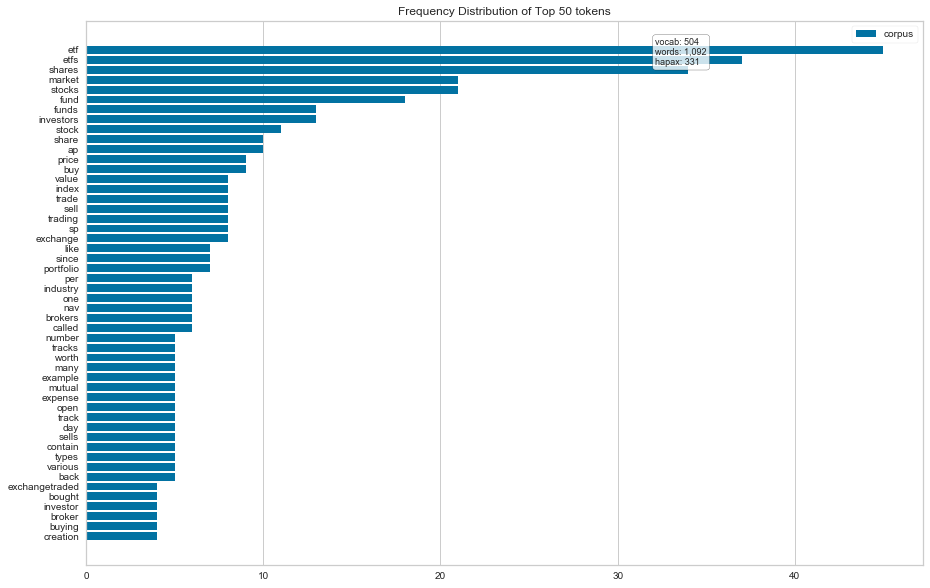

In [8]:
disaster_tweets = data_clean[data_clean['target'] == 1]
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(disaster_tweets['text'])
features_disaster   = vectorizer.get_feature_names()
plt.figure(figsize=(15,10))
visualizer_disaster = FreqDistVisualizer(features=features_disaster, orient='h')
visualizer_disaster.fit(docs)
visualizer_disaster.show()

### Dùng mô hình SHAP (áp dụng lý thuyết trò chơi) vào dự đoán thành phần chính

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn

X_train, X_test, y_train, y_test = train_test_split(data_clean['text'],data_clean['target'],random_state = 0)
vectorizer = TfidfVectorizer(min_df=1)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Trực quan kết quả

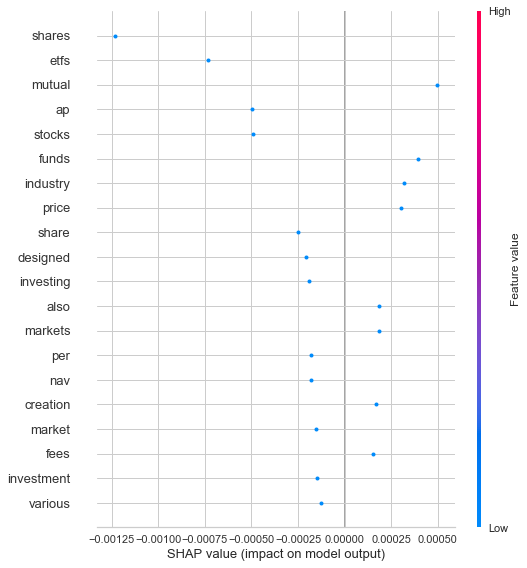

In [12]:
import shap
shap.initjs()
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")
shap_values = explainer.shap_values(X_test)
X_test_array = X_test.toarray()
shap.summary_plot(shap_values, X_test_array, feature_names=vectorizer.get_feature_names())

In [13]:
ind = 0
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test_array[ind,:],
    feature_names=vectorizer.get_feature_names())

### Dùng ELI5 để giải thích

In [17]:
import eli5
eli5.show_weights(model, vec=vectorizer, top=20)

Weight?,Feature
+0.016,shares
+0.007,ap
+0.006,etf
+0.006,market
+0.005,since
+0.004,share
+0.004,nav
+0.004,per
+0.004,industry
+0.004,worth


### Trực quan dự báo từng câu bằng lí thuyết xác suất

In [11]:
eli5.show_prediction(model, data_clean['text'].iloc[100], vec=vectorizer)

Predict 1 input ngẫu nhiên bên ngoài

In [12]:
eli5.show_prediction(model, 'deeds reason earthquake may allah forgive us', vec=vectorizer)
#print(data_clean.iloc[57])

Weight của các feature

In [13]:
eli5.show_weights(model)

Weight?,Feature
+1.056,x136
+0.985,x454
+0.898,x897
+0.884,x350
+0.880,x348
+0.831,x515
+0.762,x111
+0.710,x960
+0.706,x721
+0.692,x1043


In [14]:
eli5.show_prediction(model, data_clean['text'].iloc[100], vec=vectorizer)